# Confidence interval of a proportion

## The binomial distribution

In [1]:
import numpy as np

In [8]:
coins = np.random.binomial(10, .5, 10000)

In [9]:
np.mean(coins)

5.0115

In [10]:
coins

array([5, 3, 4, ..., 6, 6, 6])

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

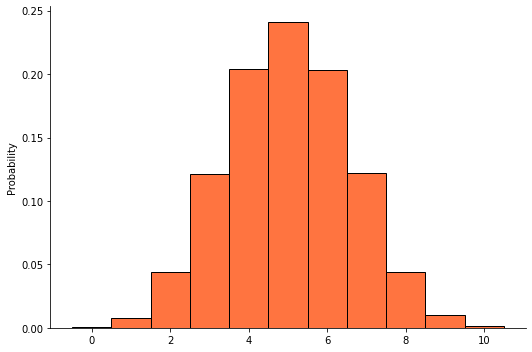

In [30]:
sns.displot(coins, stat='probability', binwidth=1, discrete=True, aspect=1.5, color='orangered');

In [8]:
proba = np.sum(coins == 7) / 10000
print(proba)

0.1179


In [31]:
from scipy.stats import binom

In [37]:
n = 10
p = .5
model = binom(n, p)
model.stats()

(array(5.), array(2.5))

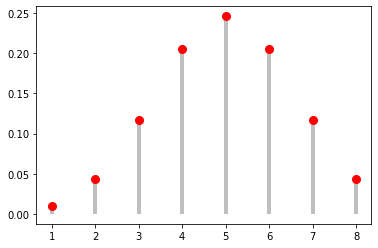

In [38]:
x = np.arange(
    model.ppf(.001),
    model.ppf(.999))
plt.plot(x, model.pmf(x), 'ro', ms=8)
plt.vlines(x, 0, model.pmf(x), colors='grey', lw=4, alpha=.5);

In [42]:
patients = binom(30, .05).rvs(10000)
patients

array([4, 1, 1, ..., 1, 1, 1])

In [43]:
proba_patients = np.sum(patients == 10)
print(proba_patients)

0


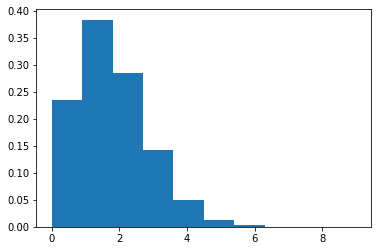

In [63]:
plt.hist(patients, density=True, histtype='stepfilled');

In [57]:
n = 600
p = 0.4

In [51]:
democrates = binom(n=n, p=p).rvs(size=10000)

In [52]:
democrates

array([230, 232, 253, ..., 242, 242, 247])

In [53]:
proba_democrates = np.sum(democrates == .45*600) / 10000 # probability to draw 270
print(proba_democrates)

0.0017


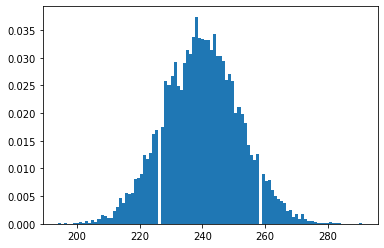

In [54]:
plt.hist(democrates, density=True, bins=100);

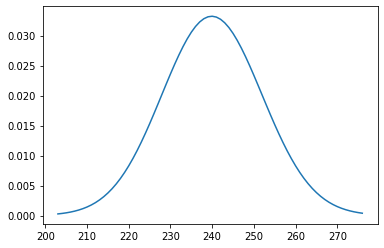

In [78]:
x = np.arange(   # linspace not appropriate for non-continuous distributions
    binom(n,p).ppf(.001),
    binom(n,p).ppf(.999),
    step=1)
plt.plot(x, binom(n,p).pmf(x),);
#plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=.5);

## Example of CI with free throws in basketball (page 32)

In [79]:
basket = np.random.binomial(20, .85, 10000)

In [80]:
basket

array([15, 16, 20, ..., 16, 18, 15])

In [81]:
np.percentile(basket, [2.5, 97.5])

array([14., 20.])

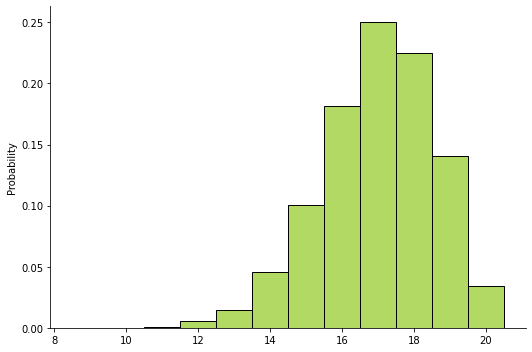

In [85]:
sns.displot(basket, stat='probability', binwidth=1, discrete=True, aspect=1.5, color='yellowgreen');

In [86]:
from scipy import stats
conf_int = stats.norm.interval(.95, np.mean(basket), np.std(basket)) # method = normal !!!
conf_int

(13.88436218185044, 20.09943781814956)

In [194]:
from statsmodels.stats import proportion
conf_int = proportion.proportion_confint(17, 20, method='binom_test')   #count=number of successe,
                                                                        #nobs =total number of trials
np.array(conf_int)

array([0.62779747, 0.95783059])

The CI ranges from 62.8% to 95.8%

## Example of CI with polling voters (page 33)

In [92]:
voters = np.random.binomial(100, .33, 10000)

In [93]:
np.mean(voters)

32.9881

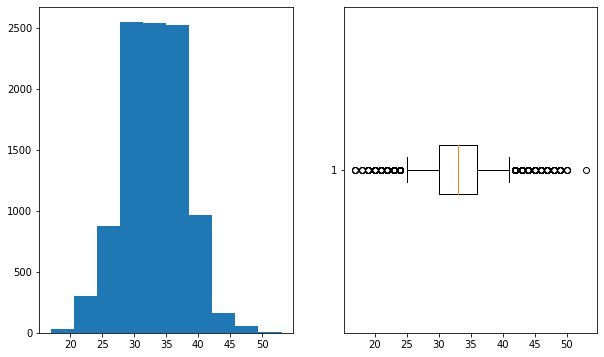

In [104]:
f, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(voters)
ax[1].boxplot(voters, vert=False, whis=[5, 95]);

In [32]:
np.percentile(voters, [2.5, 97.5])

array([24., 42.])

In [195]:
nobs=100
conf_int_vot = proportion.proportion_confint(33, nobs=nobs, method='binom_test')
np.array(conf_int_vot)

array([0.2442218 , 0.42974846])

## What does 95% confidence really means? (page 35)

In [106]:
bowl = binom(n=15, p=.25).rvs(size=10000)

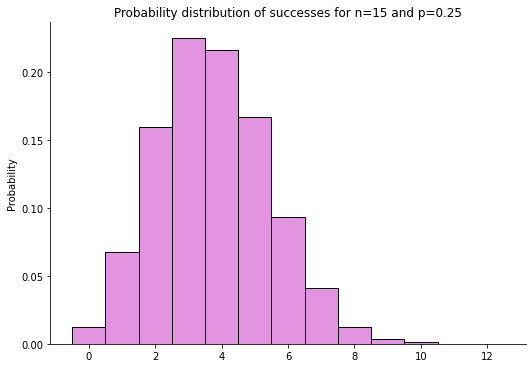

In [111]:
sns.displot(bowl, stat='probability', binwidth=1, discrete=True, aspect=1.5, color='orchid')
plt.title("Probability distribution of successes for n=15 and p=0.25");

In [107]:
frac_red_bowl = bowl/15

In [112]:
np.percentile(frac_red_bowl, [2.5, 97.5])

array([0.06666667, 0.46666667])

In [196]:
count = .25*15
conf_int_bowl = proportion.proportion_confint(count, 15, method='binom_test')
np.array(conf_int_bowl) * 15

array([0.85270301, 6.98583332])

In [115]:
A = np.random.binomial(15, .25, 100)
A

array([4, 2, 4, 7, 3, 4, 5, 2, 5, 4, 3, 2, 7, 5, 5, 4, 3, 1, 2, 2, 4, 3,
       4, 2, 1, 2, 2, 4, 5, 4, 6, 6, 2, 2, 5, 2, 5, 4, 5, 5, 6, 5, 5, 4,
       0, 2, 4, 2, 6, 6, 7, 4, 8, 6, 2, 3, 3, 6, 3, 3, 5, 5, 5, 6, 4, 2,
       4, 3, 3, 6, 1, 4, 4, 3, 3, 5, 2, 4, 2, 5, 3, 5, 3, 3, 4, 2, 2, 0,
       1, 6, 2, 0, 5, 4, 5, 3, 3, 2, 4, 7])

In [116]:
ci_A = [proportion.proportion_confint(i, 15, method='binom_test') for i in A]

In [117]:
ci_A[:3]

[(0.0966583339917372, 0.5342777848720284),
 (0.024225732468536626, 0.3967139842509865),
 (0.0966583339917372, 0.5342777848720284)]

In [140]:
(np.array(ci_A)[:,1] < 0.25) | (np.array(ci_A)[:,0] > 0.25)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

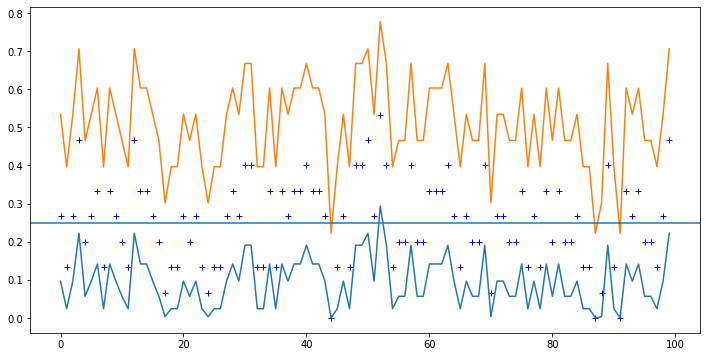

In [145]:
plt.figure(figsize=(12,6))
plt.plot(A/15, 'b+', ci_A)
plt.axhline(.25, )

In [142]:
print(f"the CI limits doesn't include the theoritical mean value (0.25) {sum((np.array(ci_A)[:,1] < 0.25) | (np.array(ci_A)[:,0] > 0.25))} times out of 100 samples")

the CI limits doesn't include the theoritical mean value (0.25) 4 times out of 100 samples


Below another way to show that 95% of the 95% CIs capture the true population mean. Nevertheless, and due to experimental bias and error, Cumming and Maillardet (2016) have shown that the first 95% CI will include the sample means of 83% of repeat experiments.

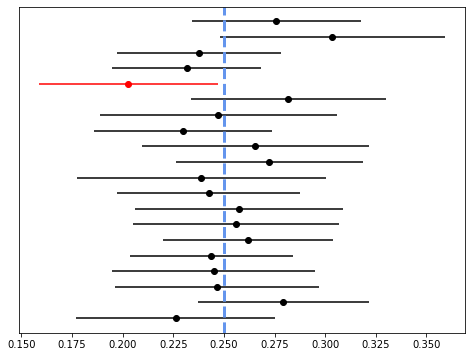

In [193]:
from scipy import stats
np.random.seed(444)

sample=[stats.norm(loc=0.25, scale=0.1).rvs(size=15) for _ in range(20)]

def W_array(array, conf=0.95):
    t=stats.t(df=len(array)-1).ppf((1+conf)/2)
    return t*stats.sem(array)

mean_list=[sample[i].mean() for i in range(20)]
W_list=[W_array(sample[i]) for i in range(20)]

plt.figure(figsize=(8,6))

for i in range(20):
    plt.errorbar(
        x=mean_list[i],
        y=i,
        xerr=W_list[i],
        fmt='o',
        c='k' if (mean_list[i] + W_list[i]/2) > 0.25 else 'r')
plt.axvline(.25, ls='--', lw=3, color='cornflowerblue')
plt.yticks([]);

Computing the CI using the modified Wald method by hand as follows:

1. $p'=\frac{s+2}{n+4}$ with $s$ the number of successes and $n$ the number of trials
2. The margin of error is: $W=2\sqrt{\frac{p'(1-p')}{n+4}}$
3. Finally, the 95% CI is from $(p'-W)$ to $(p'+W)$